## Data Exploration and Preprocessing

### Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, precision_score, accuracy_score, recall_score, balanced_accuracy_score
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics
from yellowbrick.cluster import KElbowVisualizer
import warnings
warnings.filterwarnings('ignore')

### Reading the Data

In [2]:
Data = pd.read_csv('bank.csv')
Data.head()

age         job  marital  education default  balance housing loan  contact  \
0   59      admin.  married  secondary      no     2343     yes   no  unknown   
1   56      admin.  married  secondary      no       45      no   no  unknown   
2   41  technician  married  secondary      no     1270     yes   no  unknown   
3   55    services  married  secondary      no     2476     yes   no  unknown   
4   54      admin.  married   tertiary      no      184      no   no  unknown   

   day month  duration  campaign  pdays  previous poutcome deposit  
0    5   may      1042         1     -1         0  unknown     yes  
1    5   may      1467         1     -1         0  unknown     yes  
2    5   may      1389         1     -1         0  unknown     yes  
3    5   may       579         1     -1         0  unknown     yes  
4    5   may       673         2     -1         0  unknown     yes

### Understanding Data

In [3]:
Data.shape

(11162, 17)

Our data consists of 17 columns i.e 17 variables including 1 target variable 'deposit' and 11162 rows containing records of individuals. The following project focuses on the analysis of a dataset of Bank Marketing which contains data or information about customers and aims to get useful insights from the data and predict if a new customer will accept a deposit offer or not. 

In [4]:
Data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

Attributes Description:

age : Age of customer

job : Job Type 

marital : Marital status

education : Education level of customer

default :  Does customer have credit in default?

balance : Balance of the individual

housing : Does customer have housing loan?

loan : Does customer have personal loan?

contact : Contact communication type

day :  Last contact day of the week 

month :  Last contact month of the year

duration : last contact duration, in seconds

campaign : Number of contacts performed during this campaign and for this client

pdays : Number of days that passed by after the client was last contacted from a previous campaign

previous : Number of contacts performed before this campaign and for this client

poutcome : outcome of the previous marketing campaign 

deposit : Has the client subscribed a term deposit?

In [5]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


There are 10 categorical variables and 7 numerical variables. Since there is 11162 Non-null values in all columns we can assume that the data does not contain null values.

In [6]:
Data.duplicated().sum()

0

There are no duplicate values in our dataset

In [7]:
Data.describe()

age       balance           day      duration      campaign  \
count  11162.000000  11162.000000  11162.000000  11162.000000  11162.000000   
mean      41.231948   1528.538524     15.658036    371.993818      2.508421   
std       11.913369   3225.413326      8.420740    347.128386      2.722077   
min       18.000000  -6847.000000      1.000000      2.000000      1.000000   
25%       32.000000    122.000000      8.000000    138.000000      1.000000   
50%       39.000000    550.000000     15.000000    255.000000      2.000000   
75%       49.000000   1708.000000     22.000000    496.000000      3.000000   
max       95.000000  81204.000000     31.000000   3881.000000     63.000000   

              pdays      previous  
count  11162.000000  11162.000000  
mean      51.330407      0.832557  
std      108.758282      2.292007  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       20.750000      1.000000  
max      854.000000     58.000000

Some first insights on the data: Medium age is 41 years old whereas minimum age is 18 years and maximum age is 95 years old. The std deviation of Balance looks high around 3225 as compared to the mean 1528. Campaign look balanced as its mean value is close to it's standard deviation. The pdays column must be dropped since it includes an information which is not very relevant for the analysis.

In [8]:
Data.drop('pdays', axis=1, inplace = True)

In [9]:
Data['deposit'].value_counts()/Data.shape[0]*100

deposit
no     52.616019
yes    47.383981
Name: count, dtype: float64

Data is balanced since the difference between the total number of yes and no is not huge.

## Exploratory Data Analysis

In [10]:
num = Data.select_dtypes('int64')
cat = Data.select_dtypes('object')
print('Numerical Columns', num.columns)
print('Categorical Columns', cat.columns)

Numerical Columns Index(['age', 'balance', 'day', 'duration', 'campaign', 'previous'], dtype='object')
Categorical Columns Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'deposit'],
      dtype='object')


We are first divinding our dataset into numerical and categorical columns

### Exploring Numerical Columns

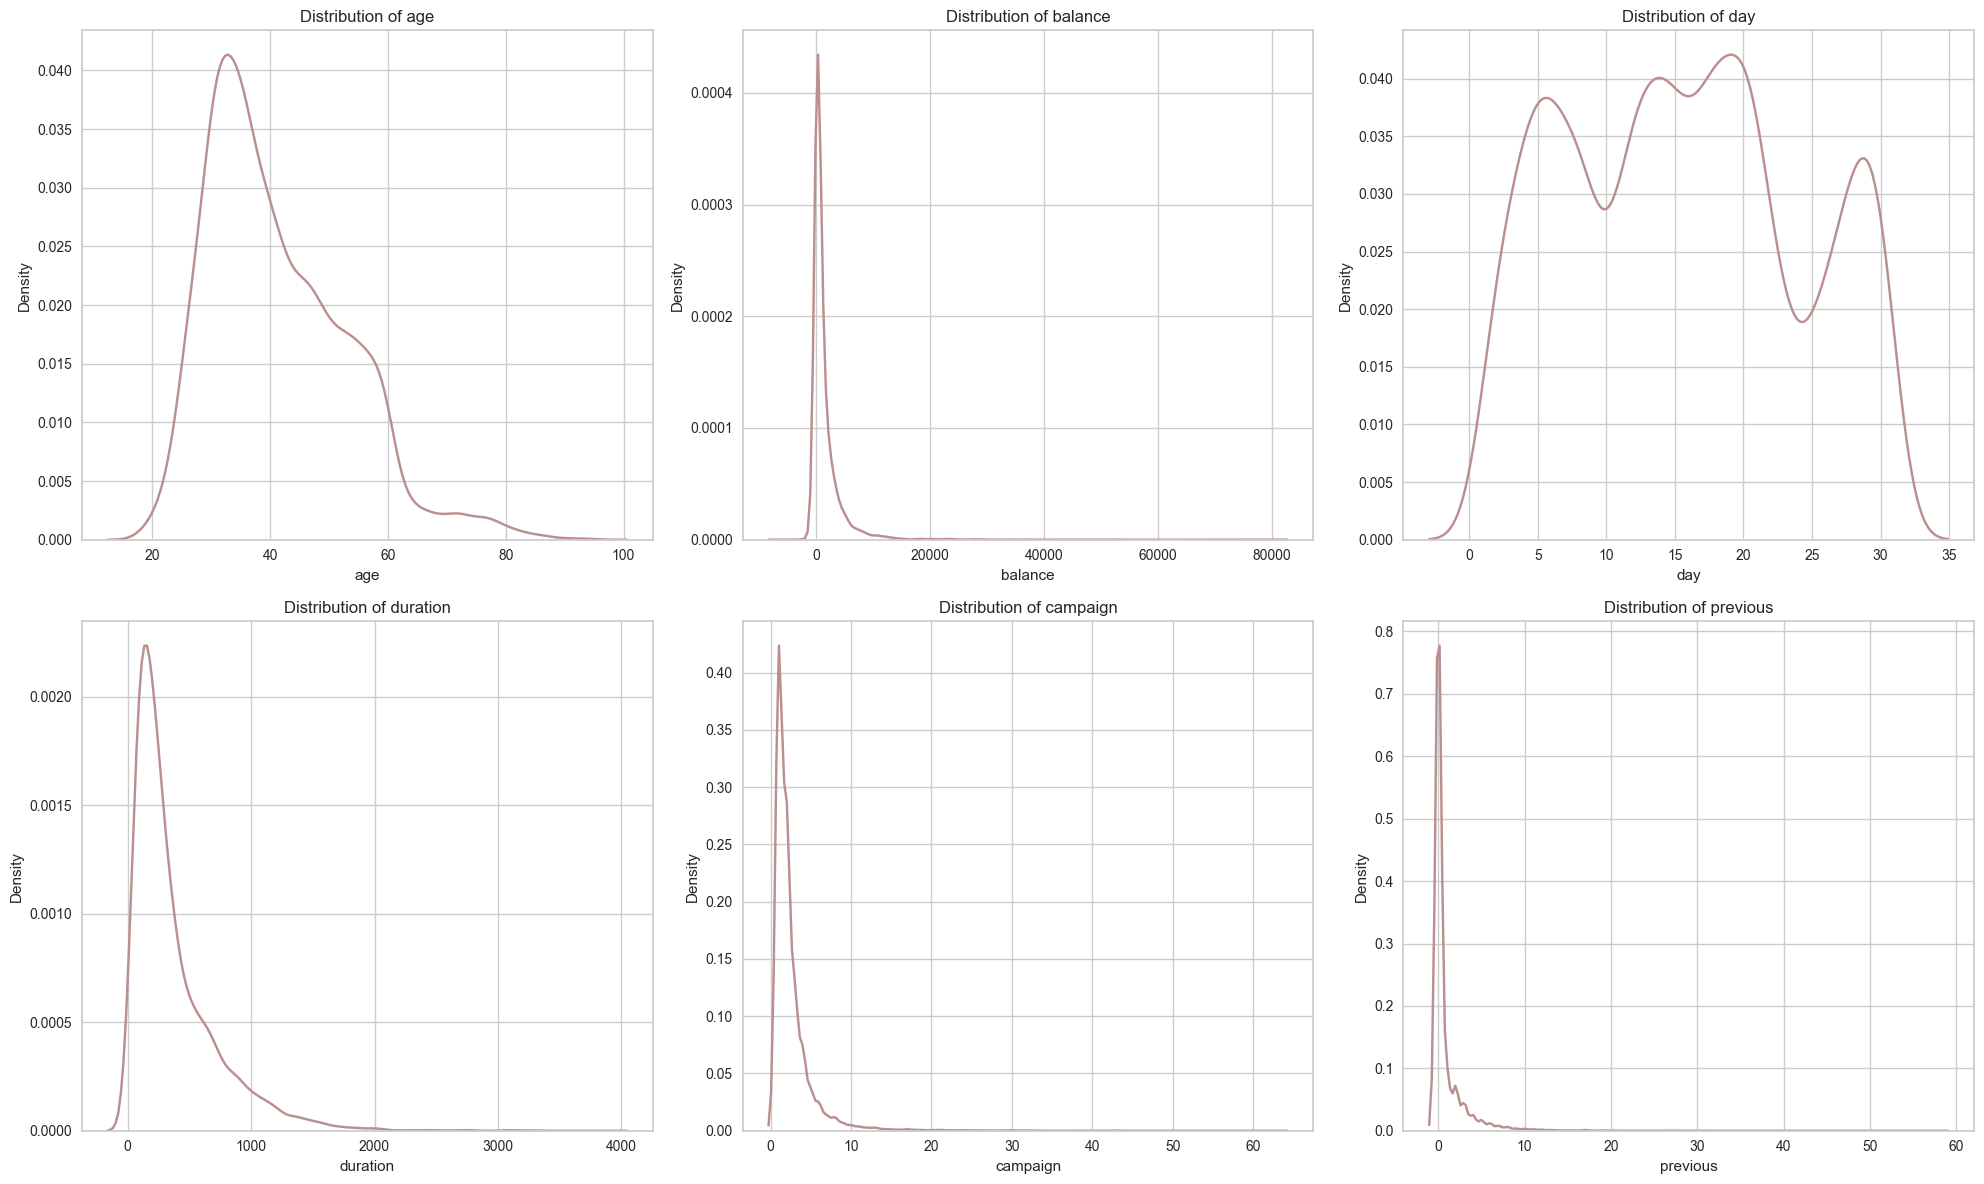

In [11]:
fig, axes = plt.subplots(2,3, figsize=(20,12))
fig.subplots_adjust(hspace=0.5)
for i, fea in enumerate(num):
    row, col = i // 3, i % 3 
    sns.kdeplot(x = fea, data = Data, color='rosybrown', ax = axes[row, col])
    axes[row, col].set_title(f"Distribution of {fea}")
plt.tight_layout()
plt.show()

The above plots show distribution of each of our numerical column.

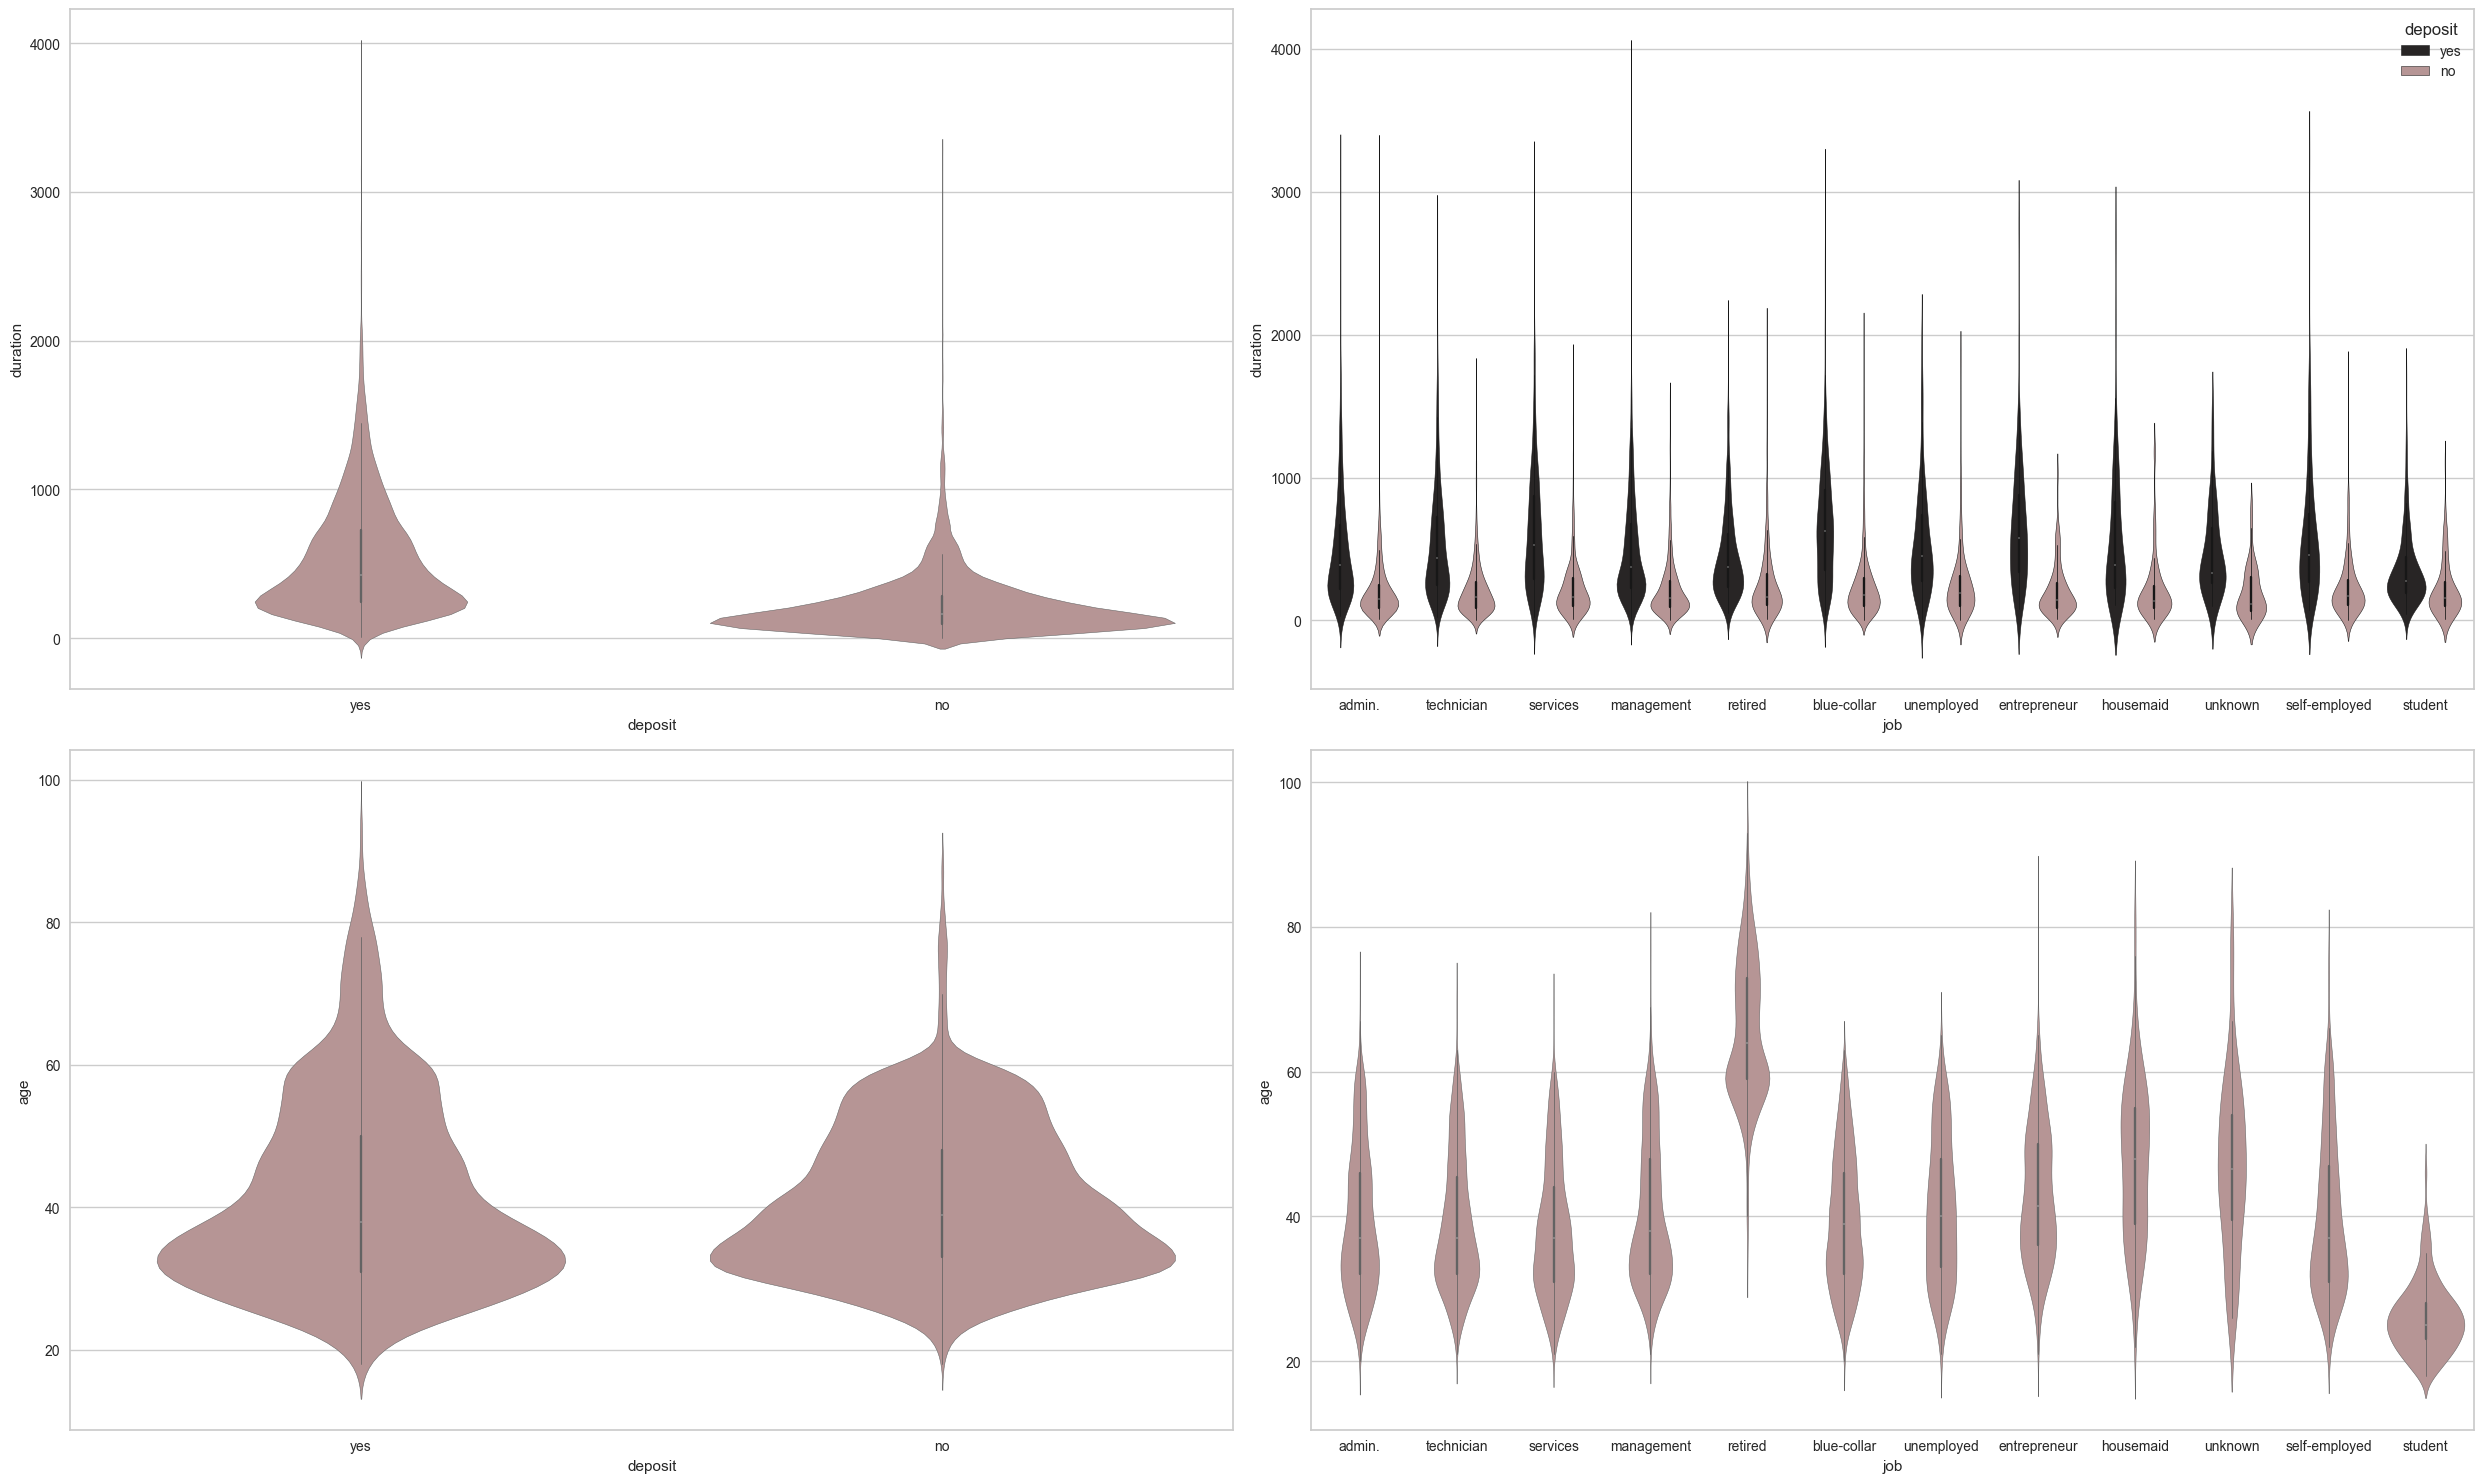

In [12]:
fig, axes = plt.subplots(2,2, figsize=(25,15))
fig.subplots_adjust(hspace=0.5)
sns.violinplot(x = 'deposit', y = 'duration', data = Data, color = 'rosybrown', ax = axes[0,0])
sns.violinplot(x = 'job', y = 'duration', hue = 'deposit', data = Data, palette='dark:rosybrown', ax = axes[0,1])
sns.violinplot(x = 'deposit', y = 'age', data = Data, color = 'rosybrown', ax = axes[1,0])
sns.violinplot(x = 'job', y = 'age', data = Data, color = 'rosybrown', ax = axes[1,1])
plt.tight_layout()
plt.show()


From the above violin plots we can note that duration of the time spent in a campaign is proportional to success of the campaign. If the time spent on call is more, the customer will tend to subscribe for the product pitched. Next we see that mostly customers with whom campaign duration was high & had opted for deposit belong to the job type 'management' followed by 'self-employed', then 'admin', 'services', 'blue-collar', 'entrepreneur' and 'housemaid'. Very few students subscribed for the campaign. Another noticeable insight is that maximum customers who subsribed for deposit, their age lie between 30-40s and also customers with greater age group tend to subscribe more than reject. In the last plot, we can get interesting but not very important insights of customers' age with respect to their job types. The most obvious is the age of retired customers which lies between 55-90 years approximately. Then the age of students which obviously lies around 18-40 years approximately. Similarly, we can observe for the rest.

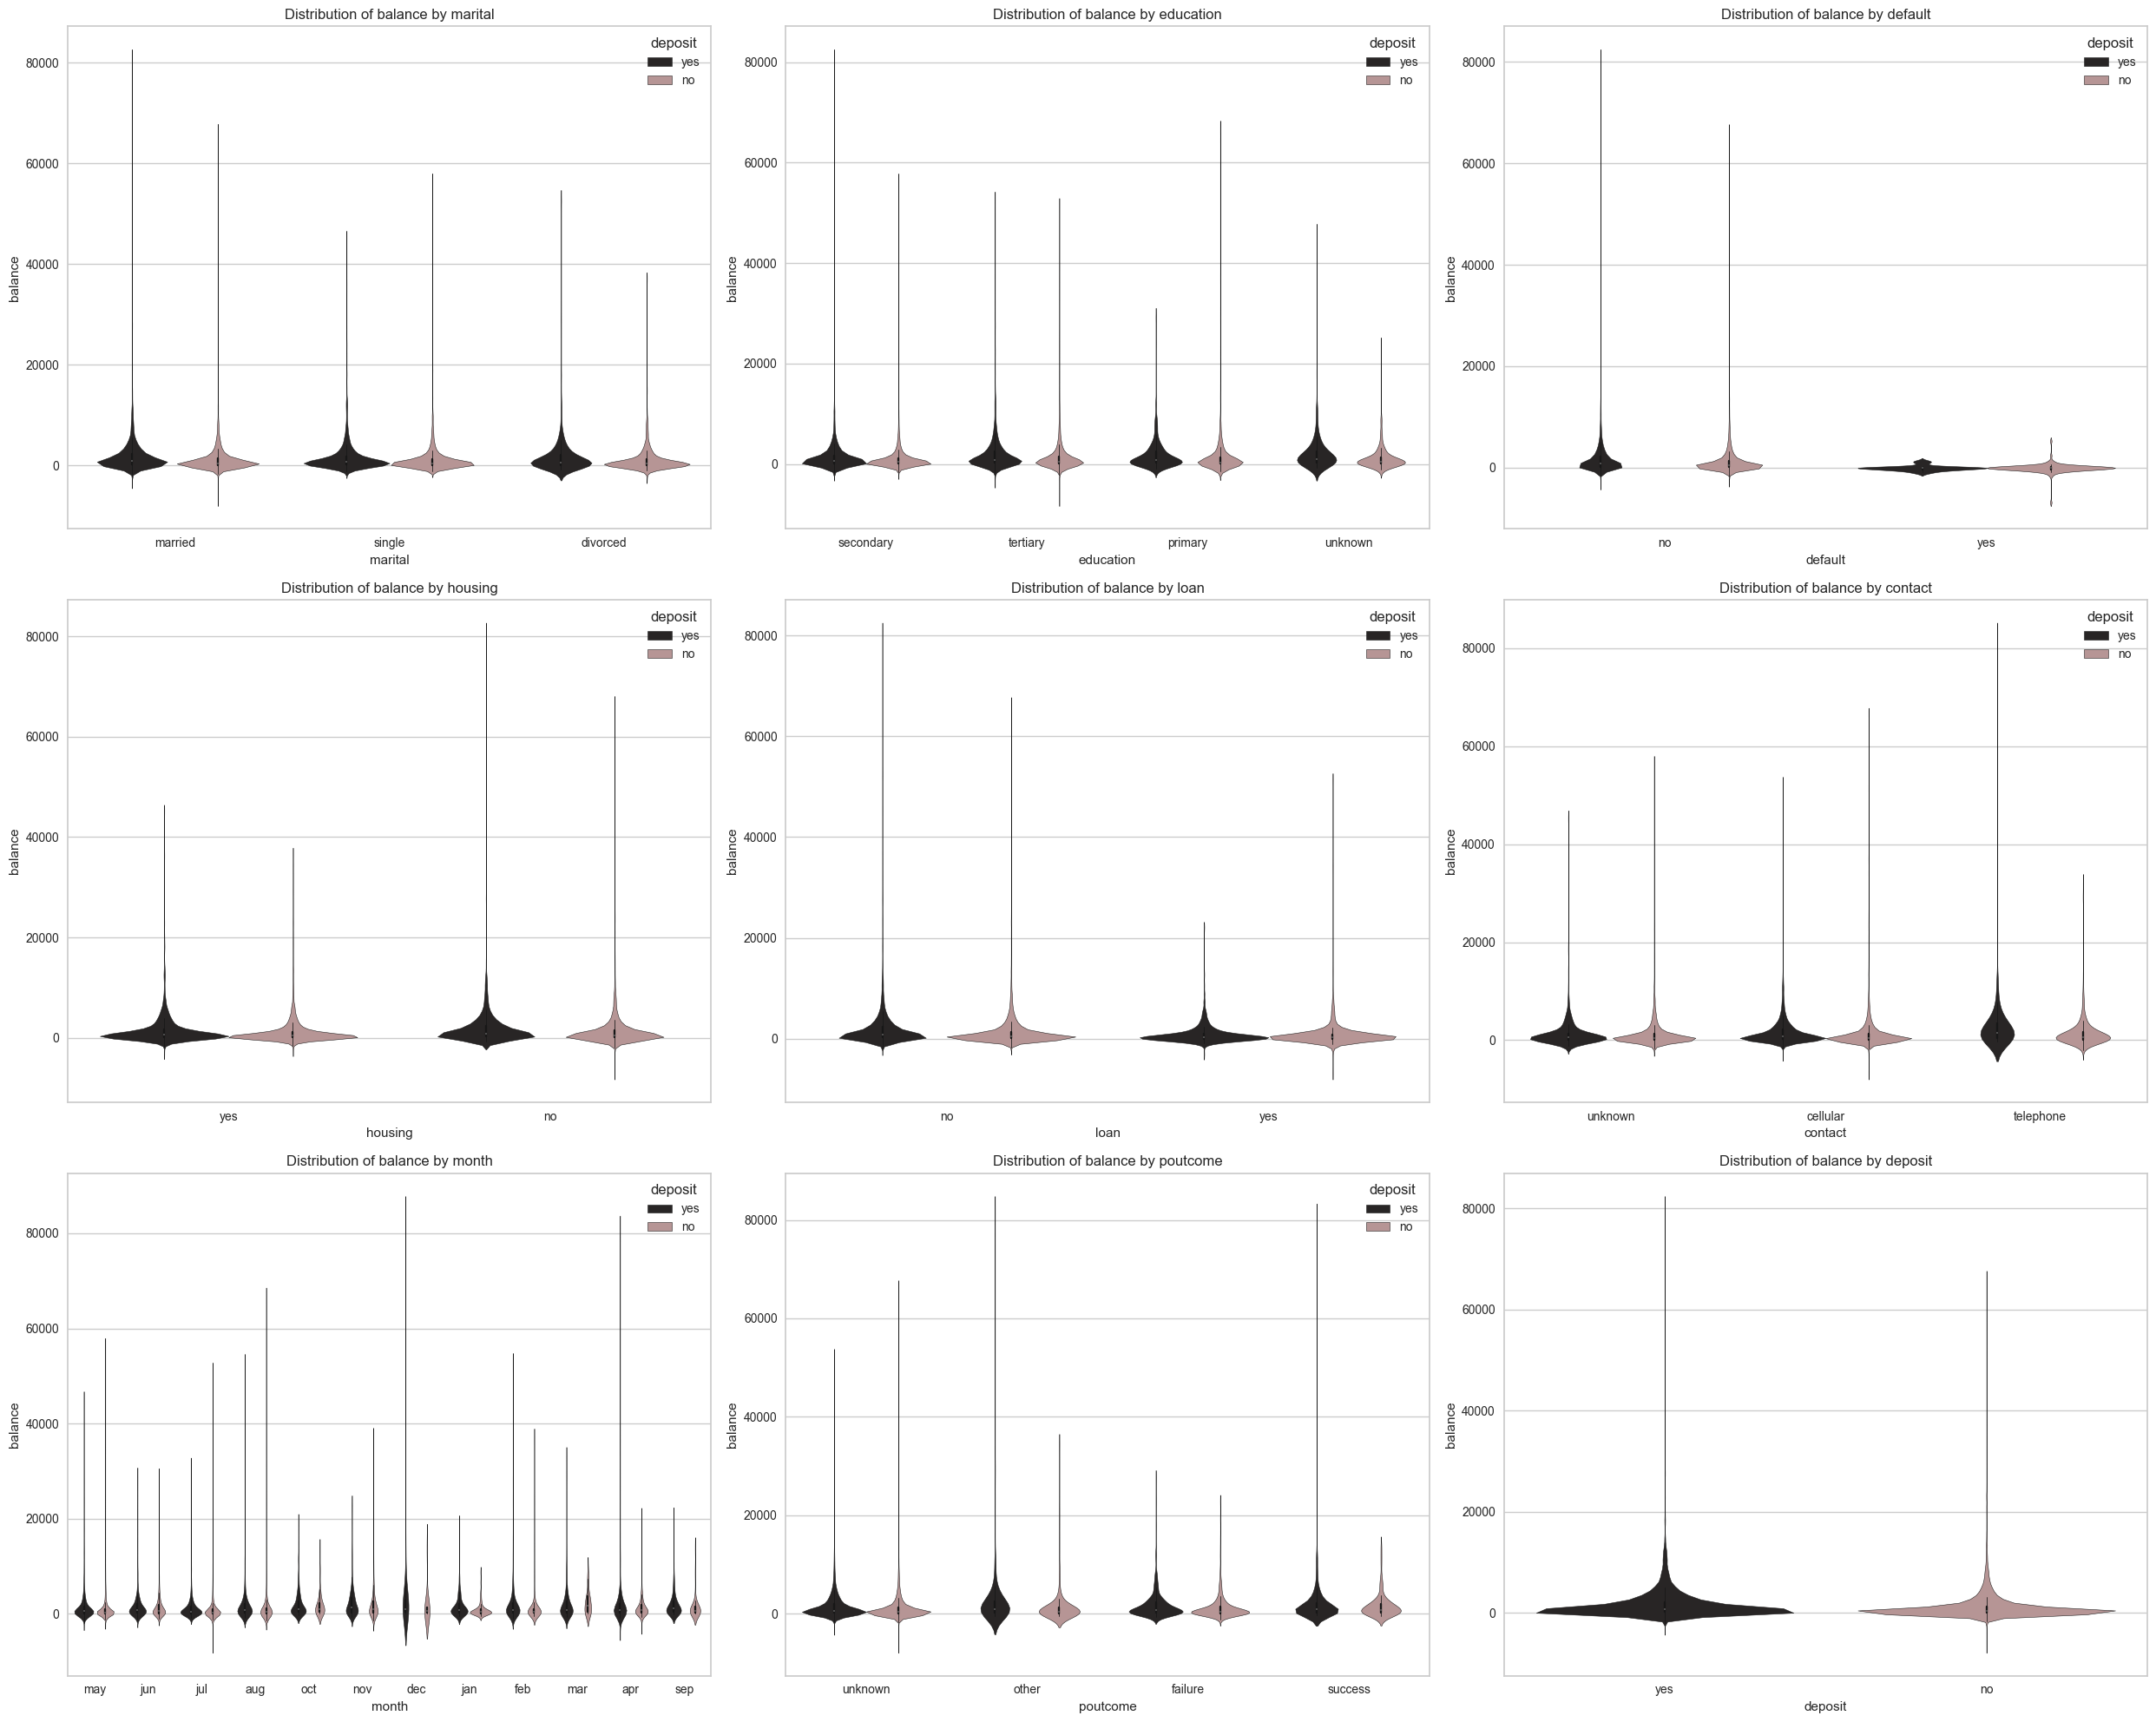

In [13]:
fig, axes = plt.subplots(3,3, figsize=(25,20))
fig.subplots_adjust(hspace=0.5)
for i, fea in enumerate(cat.iloc[:,1:10]):
    row, col = i // 3, i % 3 
    sns.violinplot(x = fea, y = 'balance', hue = 'deposit', data = Data, palette='dark:rosybrown', ax = axes[row, col])
    axes[row, col].set_title(f"Distribution of balance by {fea}")
plt.tight_layout()
plt.show()

After exploring balance of individuals on the basis of categories they belong to versus categorical columns, we can see that married people often have higher balance and tend to subscribe for deposit rather than singles followed by divorced people. Similarly, secondary education sector have have higher balance and are often inclined to opt for deposit followed by tertiary, unknown sector and lastly primary. We also note that primary sector have higher chances of not subscribing for deposit account as compared to other sectors. It seems that more customers have subscribed for deposit if they have not subscribed for housing loan, and interestingly it is the same for personal loan. If the customer has not subscribed for personal loan, they tend to subscribe for deposit more. Also, an observable insight is that people tend to have higher balance by the end of year in December or in April which is usually the start of academic year in schools. Overall, we can also conclude by remarking that customers with higher balance tend to subscribe for deposit more.

### Exploring Categorical Columns

In [14]:
fig = make_subplots(rows=2, cols=5,
                    specs=[[{'type':'domain'},{'type':'domain'},{'type':'domain'},{'type':'domain'},{'type':'domain'}],
                           [{'type':'domain'},{'type':'domain'},{'type':'domain'},{'type':'domain'},{'type':'domain'}]],
                     subplot_titles=[i for i in cat])
RosyBrown = ['rgb(237, 229, 207)','rgb(224, 194, 162)','rgb(211, 156, 131)','rgb(193, 118, 111)','rgb(166, 84, 97)','rgb(156, 63, 93)',
                      'rgb(129, 55, 83)','rgb(112, 40, 74)','rgb(84, 31, 63)','rgb(89, 13, 31)','rgb(60, 9, 17)','rgb(250, 249, 246)']
for i, fea in enumerate(cat.columns):
    fig.add_trace(go.Pie(labels = Data[fea].value_counts().index.tolist(), values = Data[fea].value_counts().tolist(), name = fea, marker_colors = RosyBrown),
                   row = i // 5 + 1, col = i % 5 + 1)
    fig.update_traces(hoverinfo='label+percent+name', textinfo='none')
    fig.update_layout(title_text='Pie plot for:', height = 900)
fig.show(renderer = 'notebook')
#Another way to plot pie charts
#for i in cat:
#    fig = px.pie(Data, values = np.ones(11162), names = i, title = f"Pie Plot for {i}", width = 700, height = 450 , color_discrete_sequence = px.colors.sequential.Brwnyl)
#    fig.show(renderer = 'notebook')''' 

Collective pie plots for all the categorical columns in the dataset shows to what proportion a particular category exists in our data.

To understand better, we can see that in the pie plot for job types, 23% of people in the observed data work in the management sector, 17.4% people have job type 'blue-collar', 16.3% people work as technician, 12% in admin and so on. Main highlights that can possibly be extracted from our data is that 3.2% of individuals are unemployed, 3.23% are students, 6.97% are retired and the rest of the individuals are employed whether self-employed or are working as an entrepreneur themselves or work in any of the high, medium or low paying job category.

In the pie plot for marital status, we see that most of the people are either married (56.9%) or single (31.9%) and very few of them are divorced (11.6%)

Next we can highlight that customers who do not have housing loan are slightly more than the customers who have housing loan and as for personal loan, most of the customers have not subscribed for personal loan clearly.

From the last few pie plots, we can observe that most customers were last contacted in the months April, May, June, July and August than the other months, outcome of which are mostly unknown while very few percentage of people i.e 9.6% succesfully subscribed for deposit whereas 11% of customers did not go for it.

Overall, the percentage of account holders who subscribed for deposit (47.4%) is slightly less than the ones who did not succesfully subscribe for deposit (52.6%).

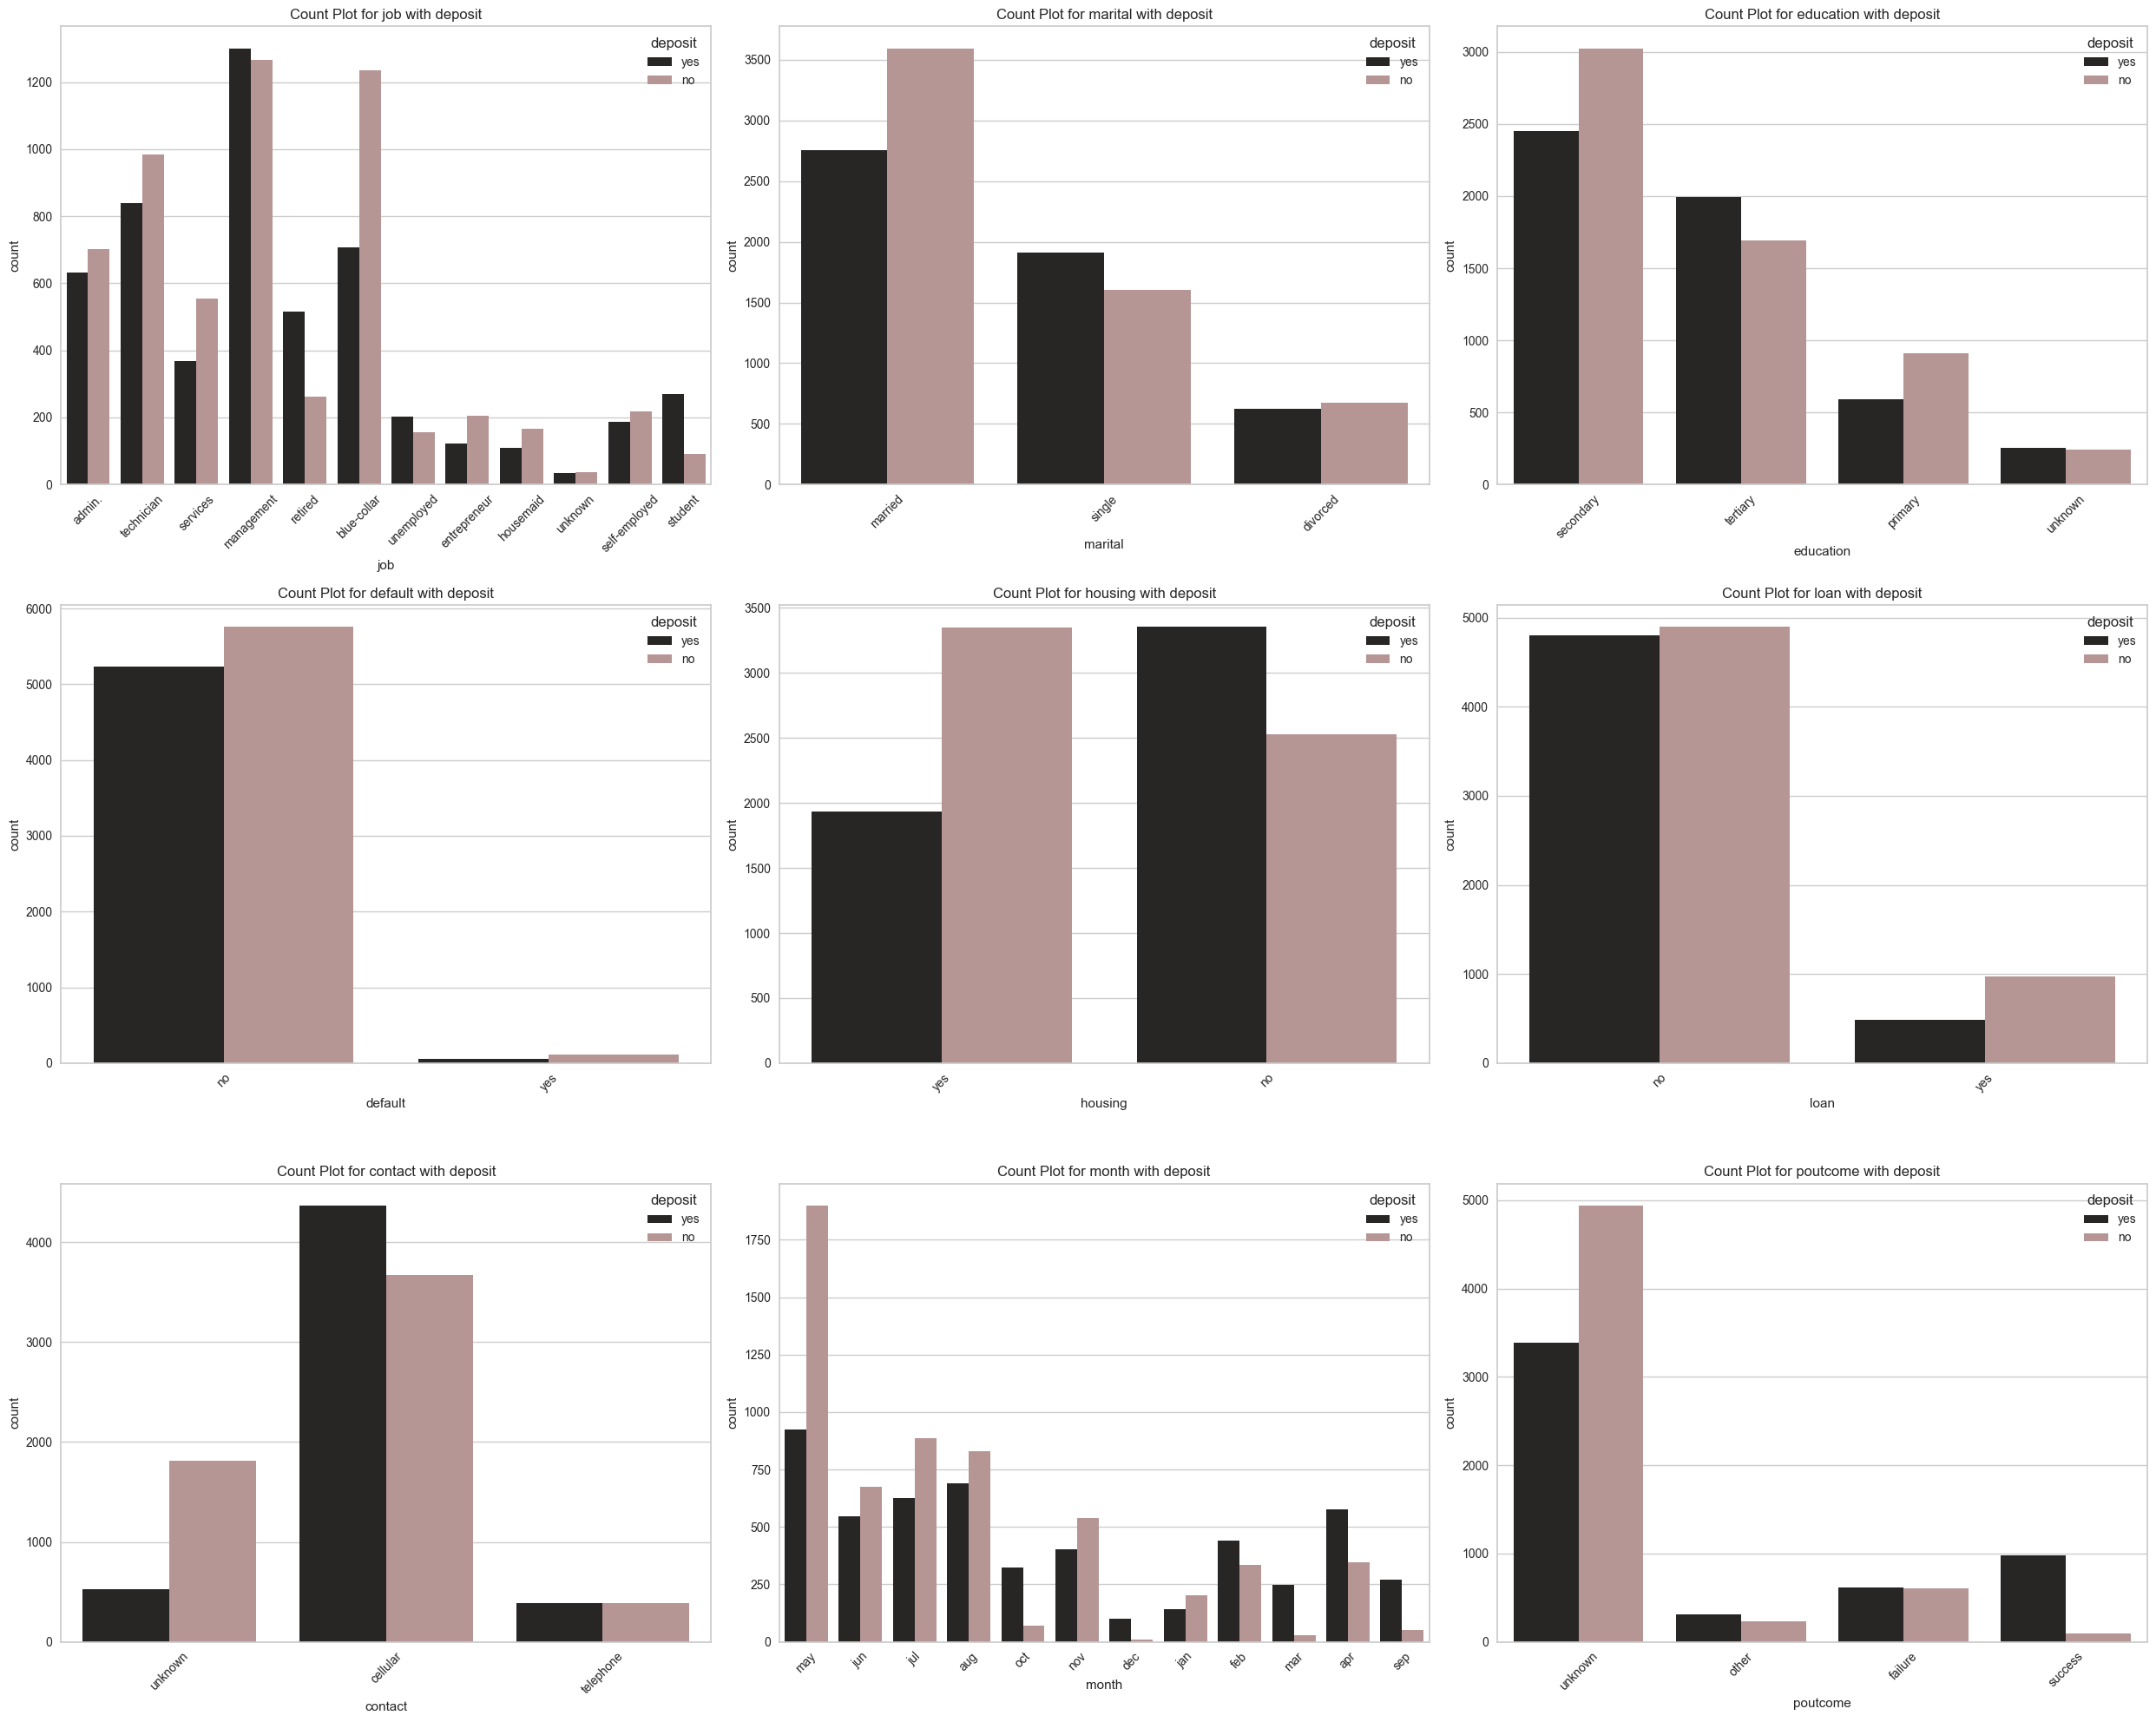

In [15]:
fig, axes = plt.subplots(3,3, figsize=(25,20))
fig.subplots_adjust(hspace=0.5)
for i, fea in enumerate(cat.iloc[:,0:9]):
    row, col = i // 3, i % 3 
    ax = sns.countplot(x=fea, hue='deposit', data=Data, palette = 'dark:rosybrown', ax=axes[row, col])
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)
    axes[row, col].set_title(f"Count Plot for {fea} with deposit")
plt.tight_layout()
plt.show()

Exploring countplots of each category with 'deposit' gives us the count of each  category and their sub-categories with respect to the customers having a deposit account and the ones not having a deposit account.

To start with the first subplot, we can see that the customers having 'management' as their job type mostly opt for deposit followed by technicians and then blue-collar and admin, which is why customers with these job types should be our high priority customers but since customers with other job types also opt for deposit account even if very few of them do, we should prioritise them as well. Next we see that most of the married people subscribe for deposit followed by single and then divorced. Similarly, customers having their education level as 'secondary' opt for deposit more followed by 'tertiary' and then 'primary'. Very few from the 'unknown' sector apply for deposit. Another notable insight is of customers with loan. Mostly customers who subscribed for deposit have neither housing loan nor personal loan. Lastly, we can also observe that most of the individuals that successfully subscribed for deposit were last contacted by their cellular and were mostly contacted in the month of april, may, june, jul and aug collectively. At the same time, we cannot deny that while most of the customers contacted through their cellular opted for deposit, significant number of customers also rejected to opt for deposit and while most of the customer contacted in may opted for deposit around 900, even more customers rejected to opt for deposit and the difference is significantly high i.e more than 1750 customers rejected to subscribe. To back this statement, the last subplot with the count of call outcome shows that many customers have subscribed for deposit whose call outcome was marked 'unknown' whether they have already subscribed before the contact or after and for the same outcome marked 'unknown', even more customers have not subscribed for deposit compared to the ones who have. We can also state that the call outcome is not marked accurately since there are some portion of people who have not subscribed for deposit but their call outcome was marked as 'success' which means that they have successfully subscribed which is undeniably contradicting.

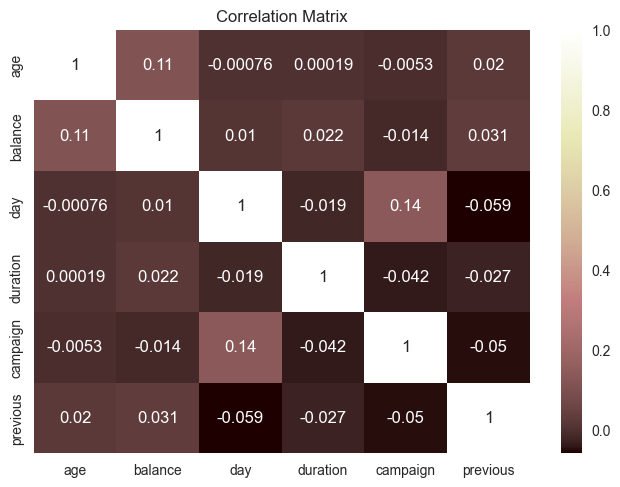

In [16]:
sns.heatmap(num.corr(),annot =True, cmap='pink')
plt.title('Correlation Matrix')
plt.show()

Observe that there is not multicollinearity problem in our data.

Also, after exploring data we have noted that day doesn't really make a huge difference to the data and if we'd like to consider 'time', month is a good feature to move forward with in our analysis. Hence, we will drop 'day' in our further analysis.

## Data Preprocessing

In [17]:
encoder = LabelEncoder()
for fea in cat:
    Data[fea] = encoder.fit_transform(Data[fea])
    print(Data[fea].value_counts())

job
4     2566
1     1944
9     1823
0     1334
7      923
5      778
6      405
8      360
10     357
2      328
3      274
11      70
Name: count, dtype: int64
marital
1    6351
2    3518
0    1293
Name: count, dtype: int64
education
1    5476
2    3689
0    1500
3     497
Name: count, dtype: int64
default
0    10994
1      168
Name: count, dtype: int64
housing
0    5881
1    5281
Name: count, dtype: int64
loan
0    9702
1    1460
Name: count, dtype: int64
contact
0    8042
2    2346
1     774
Name: count, dtype: int64
month
8     2824
1     1519
5     1514
6     1222
9      943
0      923
3      776
10     392
4      344
11     319
7      276
2      110
Name: count, dtype: int64
poutcome
3    8326
0    1228
2    1071
1     537
Name: count, dtype: int64
deposit
0    5873
1    5289
Name: count, dtype: int64


In [18]:
Data.drop('day', axis=1, inplace = True)

We have encoded all the categorical variables into numberical for further analysis

In [19]:
Data.head()

age  job  marital  education  default  balance  housing  loan  contact  \
0   59    0        1          1        0     2343        1     0        2   
1   56    0        1          1        0       45        0     0        2   
2   41    9        1          1        0     1270        1     0        2   
3   55    7        1          1        0     2476        1     0        2   
4   54    0        1          2        0      184        0     0        2   

   month  duration  campaign  previous  poutcome  deposit  
0      8      1042         1         0         3        1  
1      8      1467         1         0         3        1  
2      8      1389         1         0         3        1  
3      8       579         1         0         3        1  
4      8       673         2         0         3        1

### Specifying dependent and Independent Variables

In [20]:
X = Data.drop('deposit', axis = 1)
Y = Data['deposit']

All the variables except 'deposit' come under independent variables while 'deposit' come under dependent variables

### Implementing Stratified Sampler while Splitting into Train & Test sets

In [21]:
stratified = StratifiedShuffleSplit(n_splits = 1, test_size = 0.3, random_state = 42)
for train_set, test_set in stratified.split(X,Y):
    train = Data.loc[train_set]
    test = Data.loc[test_set]

StratifiedShuffleSplit is a hybrid of ShuffleSplit and StratifiedKFold, ensuring a balanced class label distribution in both training and test datasets. Stratified sampling is a crucial consideration in model development, whether for regression or classification, as it helps prevent overfitting. It's essential to evenly distribute influential features related to the label, such as a potential client's decision to open a term deposit

In [22]:
print('Ratio for train dataset')
print(train['deposit'].value_counts()/train.shape[0])
print()
print('Ratio for test dataset')
print(test['deposit'].value_counts()/test.shape[0])

Ratio for train dataset
deposit
0    0.526174
1    0.473826
Name: count, dtype: float64

Ratio for test dataset
deposit
0    0.526127
1    0.473873
Name: count, dtype: float64


The above ratios prove that the distribution of variables are balanced in both train and test dataset.

### Splitting Datasets

In [23]:
X_train = train.drop('deposit',axis = 1)
Y_train = train['deposit']
X_test = test.drop('deposit', axis = 1)
Y_test = test['deposit']

### Implementing Feature Scaler

In [24]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Feature Scaling normalizes independent features within a dataset to a consistent range, optimizing the accuracy of certain algorithms that rely on scaled data. Particularly for sensitive algorithms using distance formulas and gradient descent optimization, maintaining uniform value scales facilitates smoother convergence to the global minima.

## Customer Segmentation Modeling

### Model Fitting

In [25]:
LR = LogisticRegression().fit(X_train, Y_train)
SVC = LinearSVC().fit(X_train, Y_train)
DTC = DecisionTreeClassifier().fit(X_train, Y_train)
RFC = RandomForestClassifier(n_estimators = 200, random_state = 50).fit(X_train, Y_train)
GBC = GradientBoostingClassifier().fit(X_train,Y_train)
XGC = XGBClassifier(n_estimators = 80, max_depth = 5).fit(X_train,Y_train)

We will be fitting 6 models namely Logistic Regression, Linear Support Vector Classifier, Decision Tree Classifier, Random Forest Classifier, Gradient Boosting Classifer and eXtreme Gradient Boosting Classifier.

### Model Evaluation

In [26]:
print('Train Accuracy Scores')
for model in [LR,SVC,DTC,RFC,GBC,XGC]:
    accuracy = model.score(X_train, Y_train)

    df = pd.DataFrame([accuracy], columns=['Accuracy'])
    print(f'{model}'.upper())
    print(df)
    print('--------------------------------------------')

Train Accuracy Scores
LOGISTICREGRESSION()
   Accuracy
0  0.790989
--------------------------------------------
LINEARSVC()
   Accuracy
0  0.789325
--------------------------------------------
DECISIONTREECLASSIFIER()
   Accuracy
0       1.0
--------------------------------------------
RANDOMFORESTCLASSIFIER(N_ESTIMATORS=200, RANDOM_STATE=50)
   Accuracy
0       1.0
--------------------------------------------
GRADIENTBOOSTINGCLASSIFIER()
   Accuracy
0   0.85089
--------------------------------------------
XGBCLASSIFIER(BASE_SCORE=NONE, BOOSTER=NONE, CALLBACKS=NONE,
              COLSAMPLE_BYLEVEL=NONE, COLSAMPLE_BYNODE=NONE,
              COLSAMPLE_BYTREE=NONE, DEVICE=NONE, EARLY_STOPPING_ROUNDS=NONE,
              ENABLE_CATEGORICAL=FALSE, EVAL_METRIC=NONE, FEATURE_TYPES=NONE,
              GAMMA=NONE, GROW_POLICY=NONE, IMPORTANCE_TYPE=NONE,
              INTERACTION_CONSTRAINTS=NONE, LEARNING_RATE=NONE, MAX_BIN=NONE,
              MAX_CAT_THRESHOLD=NONE, MAX_CAT_TO_ONEHOT=NONE,
    

Accuracy Scores for Train set show that our models Decision Tree Classifier, Random Forest Classifier, Gradient Boost classifier and XGBoost Classifier have good accuracy values and can be used further but what matters the most is how good it fits our test models.

In [27]:
print('Test Scores')
for model in [LR,SVC,DTC,RFC,GBC,XGC]:
    Y_pred = model.predict(X_test)
    accuracy = accuracy_score(Y_test, Y_pred)
    f1 = f1_score(Y_test, Y_pred)
    precision = precision_score(Y_test, Y_pred)
    recall = recall_score(Y_test, Y_pred)
    balanced_accuracy = balanced_accuracy_score(Y_test, Y_pred)

    df = pd.DataFrame([[accuracy, f1, precision, recall, balanced_accuracy]], columns=['Accuracy', 'f1_score', 'Precision', 'Recall', 'Balanced_accuracy'])
    print(f'{model}'.upper())
    print(df)
    print('--------------------------------------------')

Test Scores
LOGISTICREGRESSION()
   Accuracy  f1_score  Precision    Recall  Balanced_accuracy
0  0.798746  0.782581   0.801718  0.764335           0.797037
--------------------------------------------
LINEARSVC()
   Accuracy  f1_score  Precision    Recall  Balanced_accuracy
0  0.796656  0.780252   0.799603  0.761815           0.794926
--------------------------------------------
DECISIONTREECLASSIFIER()
   Accuracy  f1_score  Precision    Recall  Balanced_accuracy
0  0.758137  0.740218   0.753756  0.727158           0.756598
--------------------------------------------
RANDOMFORESTCLASSIFIER(N_ESTIMATORS=200, RANDOM_STATE=50)
   Accuracy  f1_score  Precision    Recall  Balanced_accuracy
0  0.842341  0.837538     0.8184  0.857593           0.843098
--------------------------------------------
GRADIENTBOOSTINGCLASSIFIER()
   Accuracy  f1_score  Precision    Recall  Balanced_accuracy
0  0.838459  0.833179   0.815821  0.851292           0.839096
-------------------------------------------

Evaluation Metrics for Test models show that our model Gradient Boosting Classifier fits perfectly with accuracy 84.47% although the accuracy score isn't the highest for the model, followed by XGBoost Classifer with score 85.3% and lastly Random Forest Classfier with score 84.59%. All the three models have considerable metrics score.

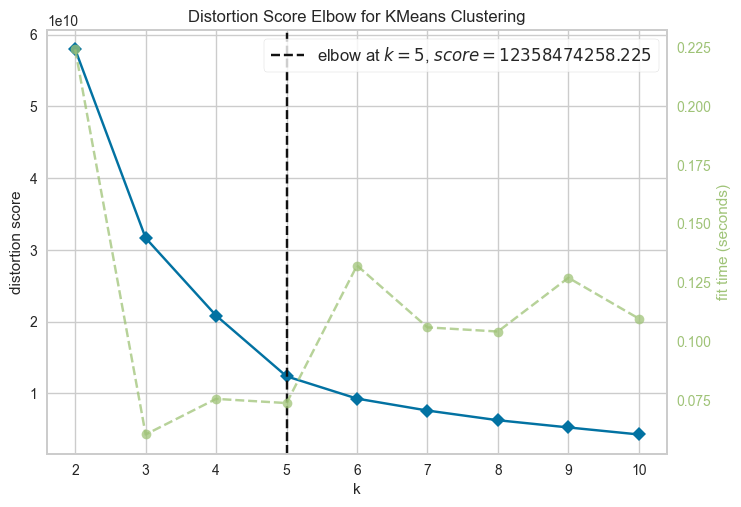

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [28]:
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(Data)
Elbow_M.show()

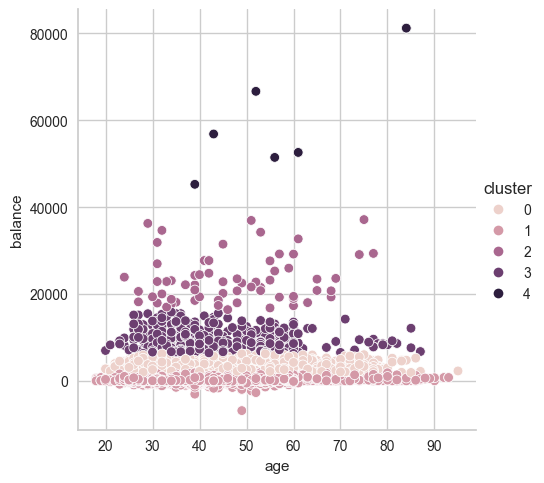

In [29]:
KM = KMeans(n_clusters = 5, init = 'k-means++', random_state = 0, n_init = 30, max_iter = 100)
clusters = KM.fit_predict(Data)
Data['cluster'] = clusters
sns.relplot(x = 'age', y = 'balance', hue = 'cluster', data = Data)

In [30]:
groups = Data.groupby(['cluster', 'job', 'marital', 'education']).agg(['median', 'sum', 'count']).round()
groups['pct_total'] = (groups['balance']['sum'] / groups['balance']['sum'].sum()).round(3)*100
top = groups.sort_values(by='pct_total', ascending=False)
top.head(30)

age              default            balance  \
                              median    sum count  median sum count   median   
cluster job marital education                                                  
0       4   1       2           43.0   9635   218     0.0   0   218   3301.0   
3       4   2       2           32.0   1838    54     0.0   0    54   8602.0   
0       4   2       2           32.0   4870   145     0.0   0   145   3141.0   
3       4   1       2           46.0   2430    54     0.0   0    54   8096.0   
2       4   1       2           44.0    848    19     0.0   0    19  23189.0   
0       1   1       1           41.0   4854   117     0.0   0   117   2887.0   
1       4   1       2           39.0  35885   866     0.0  15   866    298.0   
0       9   1       1           42.0   4668   109     0.0   0   109   3020.0   
3       9   1       1           44.0   1751    38     0.0   0    38   8740.0   
0       1   1       0           46.0   4084    90     0.0   0    90   3362.0   
1       4   2       2           32.0  19266   573     0.0  12   573    404.0   
        1   1       1           38.0  23710   599     0.0  12   599    351.0   
0       5   1       1           64.0   4424    68     0.0   0    68   3016.0   
        0   1       1           47.0   3388    73     0.0   0    73   3415.0   
        7   1       1           39.0   2679    66     0.0   0    66   2988.0   
1       0   1       1           40.0  18592   455     0.0   6   455    304.0   
        9   1       1           40.0  20569   494     0.0   9   494    309.0   
0       4   0       2           46.0   2806    59     0.0   0    59   2885.0   
        9   2       1           32.0   1897    58     0.0   0    58   3266.0   
        5   1       0           70.0   3984    58     0.0   0    58   3277.0   
        9   2       2           32.0   1711    52     0.0   0    52   2962.0   
3       9   2       2           30.0    500    16     0.0   0    16  11862.0   
        0   1       1           43.0    864    20     0.0   0    20   8782.0   
4       5   1       1           84.0    168     2     0.0   0     2  81204.0   
1       9   2       1           32.0  11370   340     0.0  10   340    354.0   
0       0   2       1           38.0   2107    53     0.0   0    53   2892.0   
2       5   1       1           65.0    448     7     0.0   0     7  20723.0   
3       5   1       0           62.0   1049    16     0.0   0    16   9048.0   
1       1   1       0           42.0  17603   415     0.0  10   415    236.0   
        7   1       1           38.0  12957   332     0.0   0   332    294.0   

                                            housing  ... previous             \
                                  sum count  median  ...   median  sum count   
cluster job marital education                        ...                       
0       4   1       2          752222   218     0.0  ...      0.0  285   218   
3       4   2       2          500818    54     0.0  ...      0.0   89    54   
0       4   2       2          498627   145     0.0  ...      0.0  111   145   
3       4   1       2          476078    54     0.0  ...      0.0   37    54   
2       4   1       2          463768    19     0.0  ...      0.0   30    19   
0       1   1       1          386617   117     1.0  ...      0.0   48   117   
1       4   1       2          400792   866     0.0  ...      0.0  711   866   
0       9   1       1          352563   109     0.0  ...      0.0  118   109   
3       9   1       1          356242    38     0.0  ...      0.0   20    38   
0       1   1       0          321897    90     1.0  ...      0.0   56    90   
1       4   2       2          313055   573     0.0  ...      0.0  616   573   
        1   1       1          294657   599     1.0  ...      0.0  420   599   
0       5   1       1          237335    68     0.0  ...      0.0   79    68   
        0   1       1          244310    73     0.0  ...      0.0   88    73   
        7   1       1          2

### Feature Importance by Random Forest Classifier

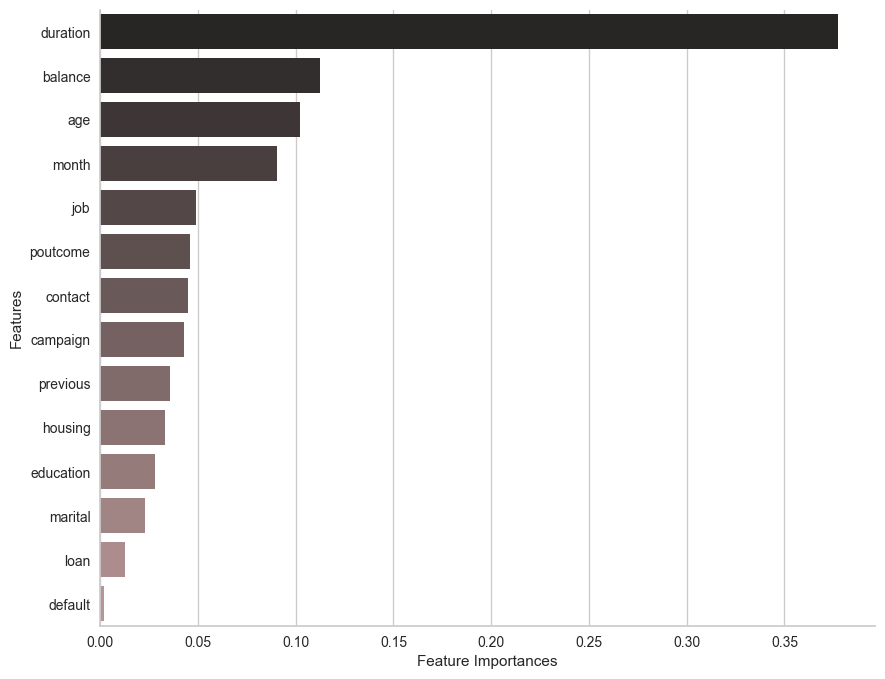

In [31]:
plt.figure(figsize=(10,8))
importances = RFC.feature_importances_
feature_importances = pd.Series(importances, index = X.columns).sort_values(ascending=False)
sns.barplot(x = feature_importances[:15], y = feature_importances.index[:15], palette = "dark:rosybrown")
sns.despine()
plt.xlabel("Feature Importances")
plt.ylabel("Features")
plt.show()

According to Random Forest Classifier model the top 5 most important features to take note of is duration followed by balance, then age, month and job.

### Feature importance by Gradient Boosting Classifier

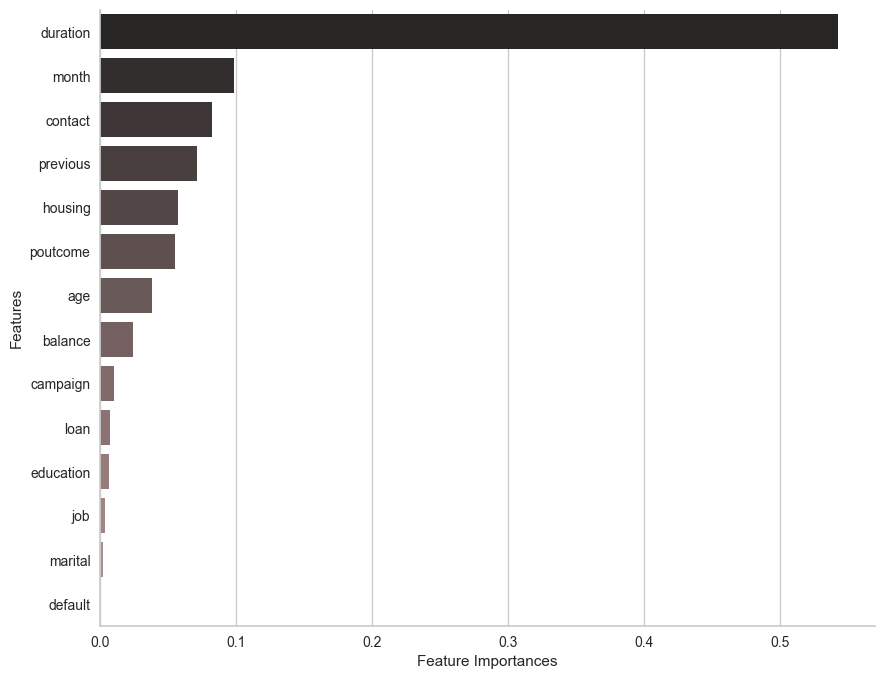

In [32]:
plt.figure(figsize=(10,8))
importances = GBC.feature_importances_
feature_importances = pd.Series(importances, index = X.columns).sort_values(ascending=False)
sns.barplot(x = feature_importances[:15], y = feature_importances.index[:15], palette = "dark:rosybrown")
sns.despine()
plt.xlabel("Feature Importances")
plt.ylabel("Features")
plt.show()

According to the model Gradient Boosting Classifer, our top most important features are again 'duration' at the top, followed by month, then contact, previous and housing.

### Feature importance by XGB Classifier

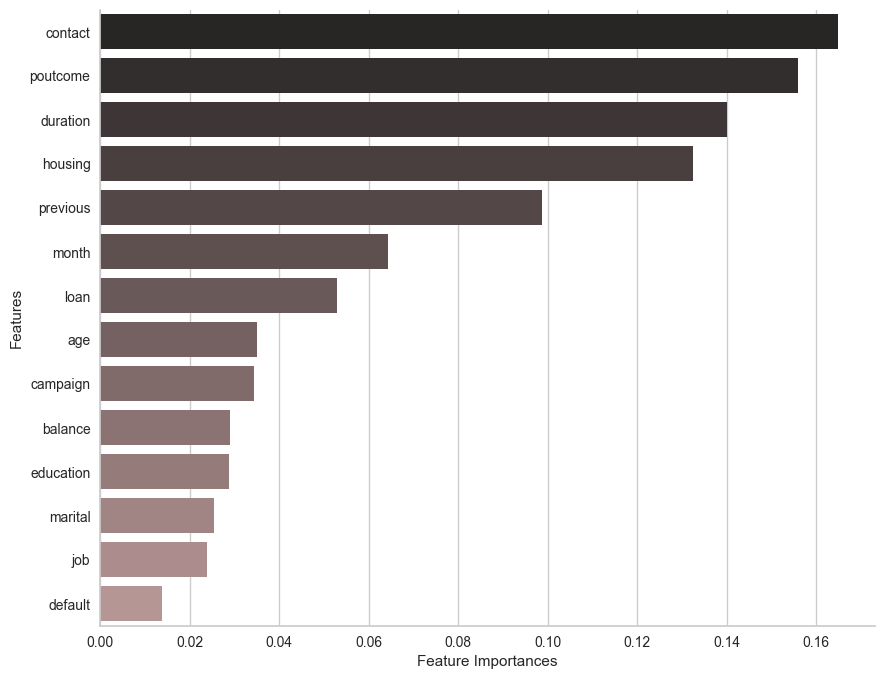

In [33]:
plt.figure(figsize=(10,8))
importances = XGC.feature_importances_
feature_importances = pd.Series(importances, index = X.columns).sort_values(ascending=False)
sns.barplot(x = feature_importances[:15], y = feature_importances.index[:15], palette = "dark:rosybrown")
sns.despine()
plt.xlabel("Feature Importances")
plt.ylabel("Features")
plt.show()

Lastly, according to our last model XGBoost, the top most important feature seems to be contact, followed by poutcome, then duration, housing and previous.

In conclusion, duration of customer calls plays a crucial role in predicting whether a customer will subscribe to a term deposit. A longer call duration, where the company engages with customers and explains its services, increases the likelihood of a subscription. However, the effectiveness of this strategy relies on the customer actually receiving the call; otherwise, the positive impact on subscription rates may be limited.

## Actions to be taken

1. Optimal Marketing Months: Focusing marketing efforts on February, March, September, October, and potentially December is advised, as May, despite high activity, resulted in the lowest effective rate (-34.49%). Subscriptions peak in fall and winter; hence, campaigns should strategically align with these seasons.

2. Call Policy: Implementing a policy limiting calls to three per potential client is recommended to enhance efficiency and reduce declines. Yet consistent contact with customers increases the likelihood of subscription.

3. Age Targeting: Prioritize targeting clients in their 20s or younger and 60s or older, as these groups show higher subscription probabilities (60% and 76%, respectively). Target age groups between 17-29 and 59-95, as they exhibit a high average probability (above 70%) of subscribing.

4. Occupation Influence: Students and retirees are more likely to subscribe, aligning with their financial behaviors as well as people in management sector.

5. House Loans and Balances:  Higher bank balances, especially above 2700, also correlate with increased subscription chances. Focus on individuals with average and high balances, as they are less likely to have house loans, increasing the chance of term deposit subscriptions. Customers without housing loans are more likely to subscribe to term deposits.

6. Call Duration Strategy: Duration is a key predictor. Higher call durations increase the chances of subscription, but success is contingent on the customer answering the call. Targeting individuals with call durations above 375 seconds presents a high likelihood (78%) of subscription success.

7. Engagement Strategies: Employing engaging questionnaires during calls can increase conversation duration, positively correlating with subscription likelihood.

8. Contact Preference: Preferential use of cellular contact is recommended for higher subscription rates.

9. Outcome of Previous Campaign: Past subscribers are more likely to subscribe again, while those with unknown outcomes exhibit lower chances.

10. Job Influence: Blue-collar workers are less likely to subscribe, while students show positive subscription indicators.

These insights, when combined, form a comprehensive strategy for an effective marketing campaign than the current one, emphasizing timing, targeted demographics, engagement tactics, and contact preferences. However, we should keep in mind that every customer holds a value and even if a certain group of customers tend to reject more rather than accept, the existence of customers of the same group accepting the offer and subscribing cannot be denied or neglected. But our prime focus or priority should be customer who are more likely to subscribe for the campaign. The overall success of the campaign is contingent on considering these multifaceted recommendations.